### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

### Scenario
Turtle Games is a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points,
- how useful are remuneration and spending scores data,
- can social data (e.g. customer reviews) be used in marketing campaigns,
- what is the impact on sales per product,
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis),
- if there is any possible relationship(s) in sales between North America, Europe, and global sales.

# Linear regression using Python
The marketing department of Turtle Games asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.shape

(2000, 11)

In [5]:
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [7]:
reviews.duplicated().sum()

0

In [8]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [9]:
# Drop unnecessary columns.
reviews_new = reviews.drop(['language', 'platform'], axis=1)

# View column names.
reviews_new.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [10]:
# Rename the column headers.
reviews_new.rename(columns={'remuneration (k£)': 'income',
                            'spending_score (1-100)': 'spending'}, 
                   inplace=True)

# View column names.
reviews_new.columns

Index(['gender', 'age', 'income', 'spending', 'loyalty_points', 'education',
       'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [11]:
# Create a CSV file as output.
reviews_new.to_csv('turtle_reviews_clean2.csv', index=False)

In [12]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
reviews_clean.head()

,gender,age,income,spending,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [13]:
# Independent variable.
y = reviews_clean['loyalty_points']

# Dependent variable.
X = reviews_clean['spending']

# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = reviews_clean).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        10:44:10   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Extract the estimated parameters.
x_coef = 33.0617
const = -75.0527

# Extract the standard errors.
x_coef_SE = 0.814
const_SE = 45.931
  
# Extract the predicted values.
test.predict()

array([1214.35337415, 2602.94449102,  123.31749662, ..., 2933.56142361,
        453.93442921,  189.44088314])

In [15]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = const + x_coef* X

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

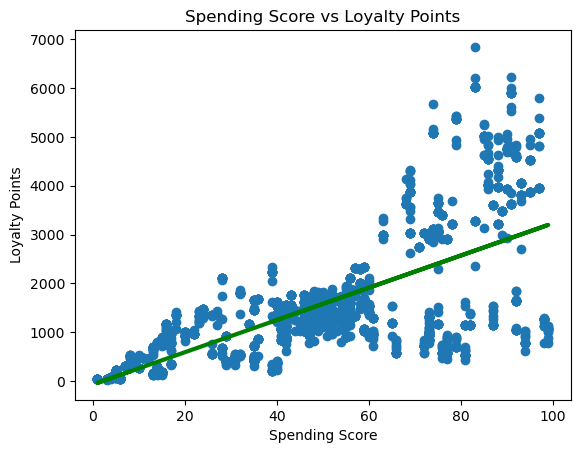

In [16]:
# Plot the graph with a regression line.
plt.scatter(X, y)
plt.plot(X, y_pred, color='green', linewidth=3)
plt.title('Spending Score vs Loyalty Points')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

### 5b) renumeration vs loyalty

In [17]:
# Independent variable.
y = reviews_clean['loyalty_points']

# Dependent variable.
X = reviews_clean['income']

# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = reviews_clean).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        10:44:10   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Extract the estimated parameters.
x_coef2 = 34.1878
const2 = -65.6865

# Extract the standard errors.
x_coef_SE2 = 0.978
const_SE2 = 52.171
  
# Extract the predicted values.
test.predict()

array([ 354.82374068,  354.82374068,  382.85775758, ..., 3102.15739671,
       3298.39551499, 3102.15739671])

In [19]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = const2 + x_coef2* X

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: income, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

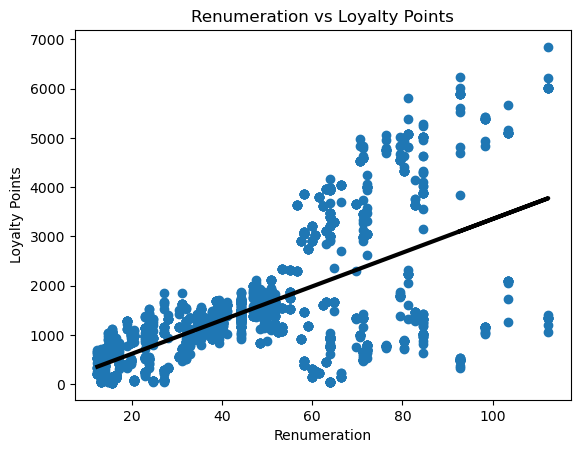

In [20]:
# Plot the graph with a regression line.
plt.scatter(X, y)
plt.plot(X, y_pred, color='black', linewidth=3)
plt.title('Renumeration vs Loyalty Points')
plt.xlabel('Renumeration')
plt.ylabel('Loyalty Points')

### 5c) age vs loyalty

In [21]:
# Independent variable.
y = reviews_clean['loyalty_points']

# Dependent variable.
X = reviews_clean['age']

# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = reviews_clean).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 24 Jul 2023   Prob (F-statistic):             0.0577
Time:                        10:44:10   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Extract the estimated parameters.
x_coef3 = -4.0128
const3 = 1736.5177

# Extract the standard errors.
x_coef_SE3 = 2.113
const_SE3 = 88.249
  
# Extract the predicted values.
test.predict()

array([1664.2872467 , 1644.22322095, 1648.2360261 , ..., 1600.0823643 ,
       1600.0823643 , 1608.1079746 ])

In [23]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = const3 + x_coef3* X

# View the output.
y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

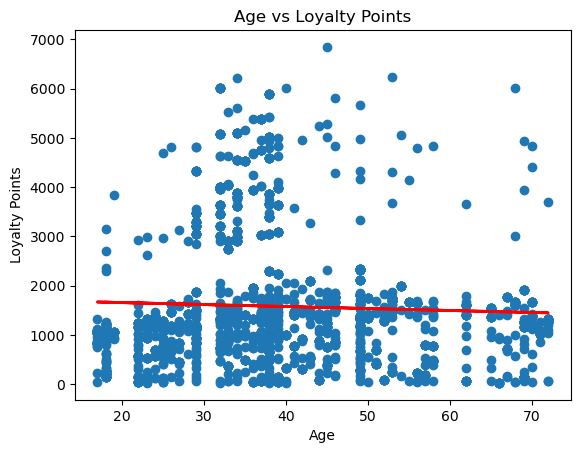

In [24]:
# Plot the graph with a regression line.
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title('Age vs Loyalty Points')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')

## 6. Observations and insights

The data consists of 11 columns and 2000 records. There are no duplicated values. 
We checked linear relationship between loyalty points and selected variables. 

> ***Loyalty points vs Spending Score***
- $R^2$: 65% of the total variability of `y` (Loyalty Points), is explained by the variability of `X` (Spending Score)
- P>|t| of slope is higher than 0.05 - the estimated slope is not significant.

> ***Loyalty points vs Renumeration***
- $R^2$: 38% of the total variability of `y` (#Loyalty Points), is explained by the variability of `X` (Spending Score)
- P>|t| of slope is higher than 0.05 - the estimated slope is not significant.

> ***Loyalty points vs Age***
- $R^2$: 0.1% of the total variability of `y` (Loyalty Points), is explained by the variability of `X` (Age)
- P>|t| of X is higher than 0.05 - the estimated X is not significant.

The accumulation of loyalty points can be partially explained by Spending Score or Renumeration of customers. There is no linear relationship between accumulated loyalty points and customers' age.

# 

# Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## 1. Load and explore the data

In [25]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Load the CSV file(s) as df2.

df = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df.head()

,gender,age,income,spending,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [27]:
# Drop unnecessary columns.
df2 = df[['income', 'spending']]

# View column names.
df2

,income,spending
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [28]:
# Explore the data.
df2.shape

(2000, 2)

In [29]:
# Descriptive statistics.
df2.describe()

,income,spending
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='spending', ylabel='income'>

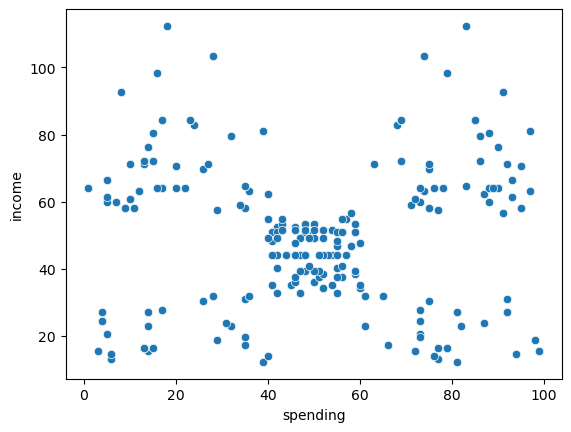

In [30]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending',
                y='income',
                data=df2)

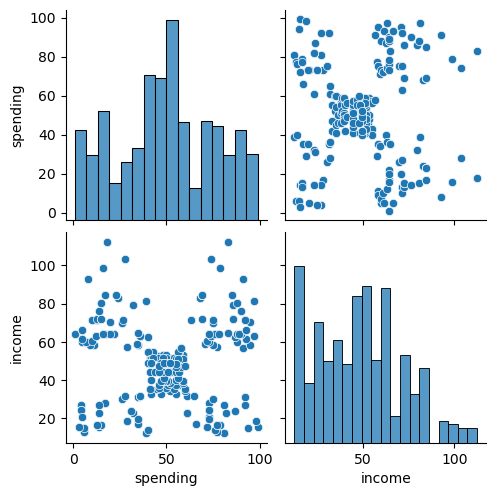

In [31]:
# Create a pairplot with Seaborn.
inp = df2[['spending', 'income']]

sns.pairplot(df2,
             vars=inp)

## 3. Elbow and silhoutte methods

### Elbow method

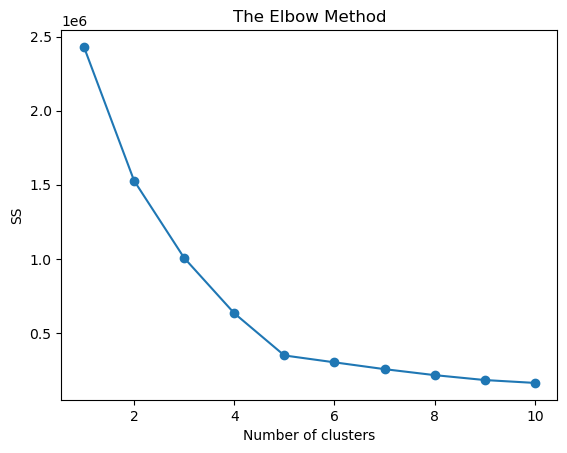

In [32]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(inp)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

### Silhoutte method

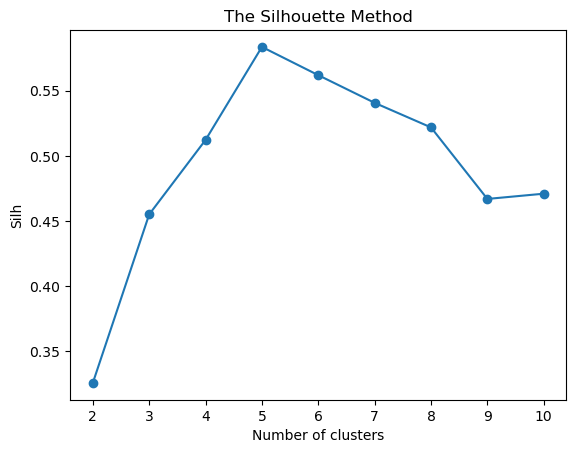

In [33]:
# Determine the number of clusters: Silhouette method.
silh = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(inp)
    labels = kmeans_s.labels_
    silh.append(silhouette_score(inp,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         silh,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silh")

plt.show()

## 4. Evaluate k-means model at different values of *k*

Based on the output above, a number of 5 clusters seems the most reasonable. We will also evaluate 4 and 6 clusters for the purpose of the analysis.

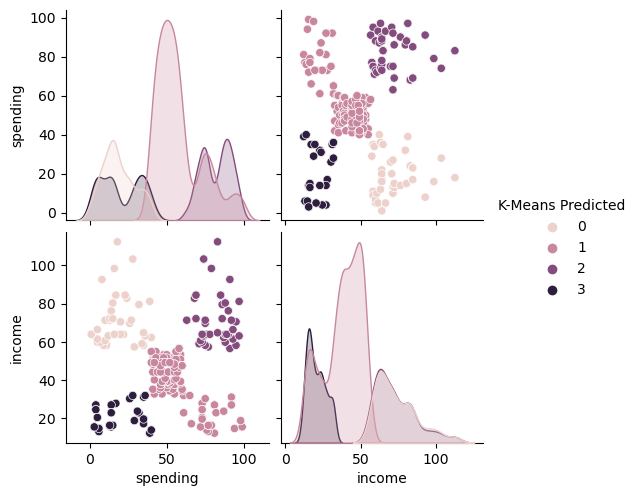

In [34]:
# 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(inp)

clusters = kmeans.labels_
inp['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(inp,
             hue='K-Means Predicted',
             diag_kind= 'kde')

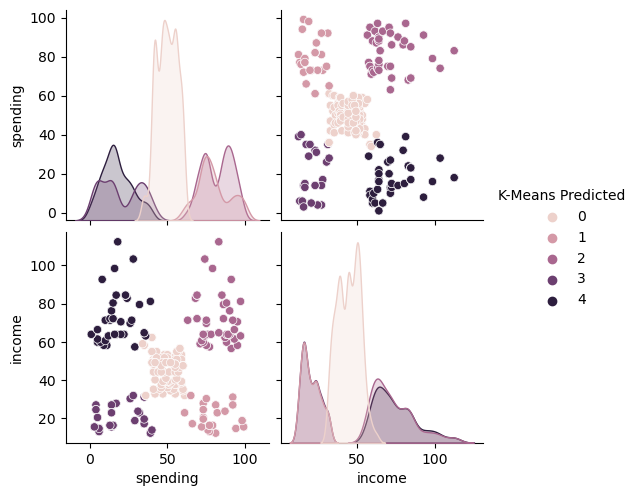

In [35]:
# 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(inp)

clusters = kmeans.labels_
inp['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(inp,
             hue='K-Means Predicted',
             diag_kind= 'kde')

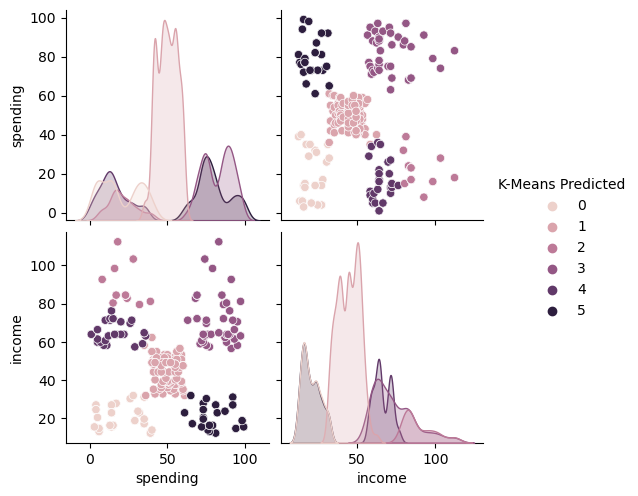

In [36]:
# 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(inp)

clusters = kmeans.labels_
inp['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(inp,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

In [37]:
# Apply the final model (5 clusters).
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(inp)

clusters = kmeans.labels_
inp['K-Means Predicted'] = clusters

In [38]:
# Check the number of observations per predicted class.
inp['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [39]:
# View the DataFrame.
print(inp.head())

   spending  income  K-Means Predicted
0        39   12.30                  3
1        81   12.30                  1
2         6   13.12                  3
3        77   13.12                  1
4        40   13.94                  3


<AxesSubplot:xlabel='spending', ylabel='income'>

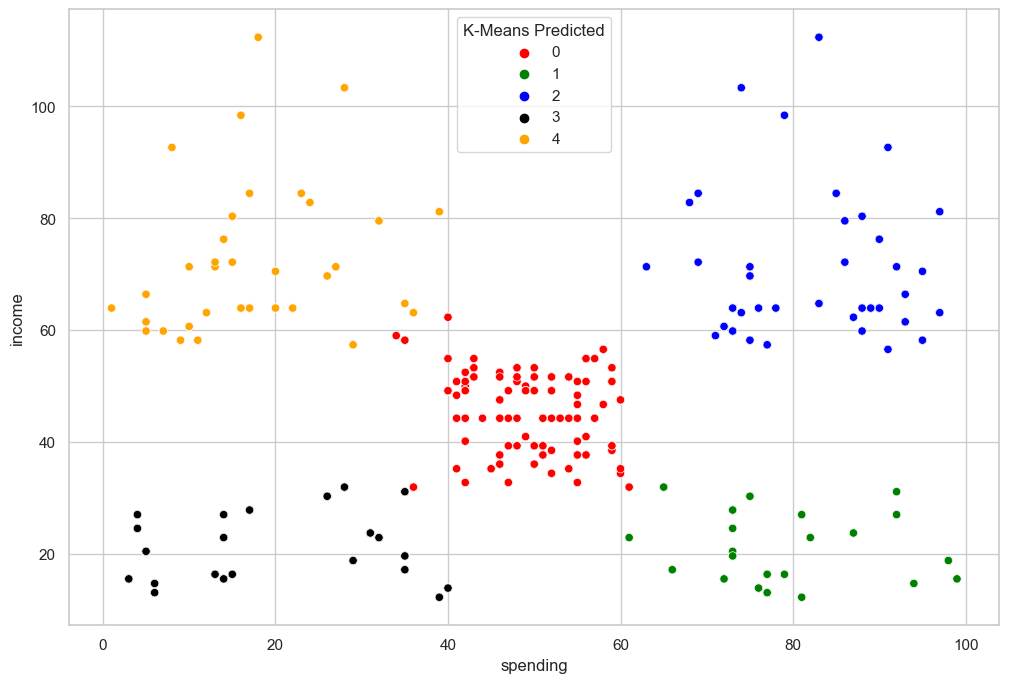

In [40]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})
sns.set_theme(style='whitegrid')

sns.scatterplot(x='spending' , 
                y ='income',
                data=inp ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## 7. Discuss: Insights and observations

We checked relationship between renumeration and spending score of customers. We decided to use k-means clustering method to divide customer base into clusters.

> ***Elbow Method***
- The sum of squares indicates 5 clusters as the most efficient grouping.

> ***Silhouette Method***
- The coefficient value ishighest at 5 clusters.

Both methods indicated 5 clusters can give the best results of the analysis. We also evaluated data clustered in 4 and 6 groups.

The final number of clusters is 5 defined based on the spending habit and income of each customer.

# 

# NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website.

## 1. Load and explore the data

In [41]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [42]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df3.head()

,gender,age,income,spending,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [43]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   income          2000 non-null   float64
 3   spending        2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [44]:
df3.shape

(2000, 9)

In [45]:
df3.columns

Index(['gender', 'age', 'income', 'spending', 'loyalty_points', 'education',
       'product', 'review', 'summary'],
      dtype='object')

In [46]:
# Keep necessary columns. Drop unnecessary columns.
df3.drop(['gender', 'age', 'income', 
          'spending', 'loyalty_points', 
          'education', 'product'],
         axis=1, inplace=True)

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [47]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [48]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [49]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [50]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon master's screen from...
2,nice art nice printing why two panels are fill...,"pretty, but also pretty useless"
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [51]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


### 2c) Drop duplicates in both columns

In [52]:
# Check the number of duplicate values.
df3.duplicated().sum()

39

In [53]:
# Drop duplicates in both columns.
df4 = df3.drop_duplicates()

# Preview data.
df4.reset_index(inplace=True)
df4.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [54]:
# View the shape of the data.
df4.shape

(1961, 3)

## 3. Tokenise and create wordclouds

In [55]:
# Create new DataFrame (copy DataFrame).
df5 = df4.copy()

# View DataFrame.
df5.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [56]:
# Apply tokenisation to both columns.
df5['review'] = df5['review'].apply(word_tokenize)
df5['summary'] = df5['summary'].apply(word_tokenize)

# View DataFrame.
df5.head()

,index,review,summary
0,0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [57]:
# Create a list to store all the tokens.
all_comments = []

# Combine 'review' and 'summary' columns into a single list of words.
for i in range(len(df5)):
    all_comments.extend(df5['review'][i] + df5['summary'][i])

In [58]:
# Convert the list of tokens into a single string.
all_comments_text = ' '.join(all_comments)

In [59]:
# Create a WordCloud object.
wordcloud = WordCloud(width = 1600, height = 900, 
                      background_color='white', 
                      colormap='plasma', 
                      max_words=200).generate(all_comments_text)

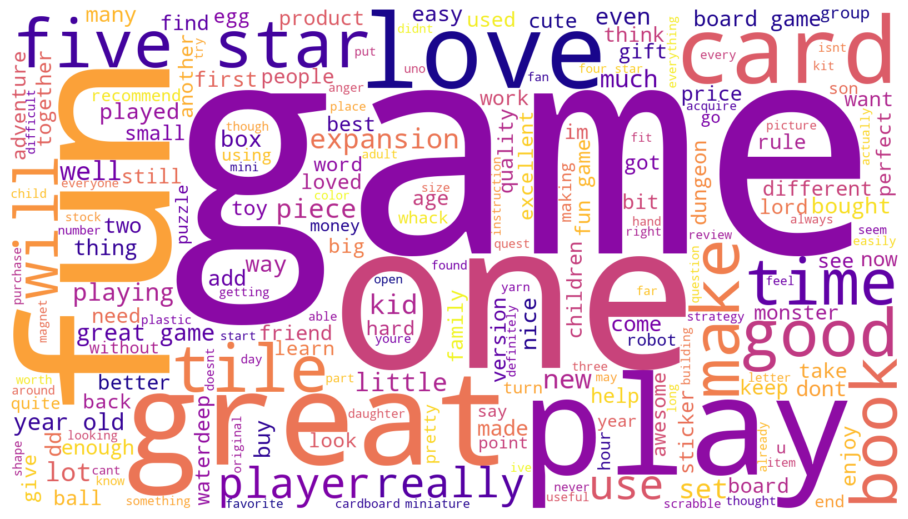

In [60]:
# Plot the WordCloud image.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [61]:
# Determine the frequency distribution.
fdist = FreqDist(all_comments)

# Preview data.
fdist

FreqDist({'the': 5712, 'and': 3401, 'a': 3400, 'to': 3354, 'of': 2627, 'it': 2233, 'i': 2176, 'game': 1990, 'this': 1911, 'is': 1885, ...})

### 4b) Remove alphanumeric characters and stopwords

In [62]:
# Delete all the alpanum.
tokens = [word for word in all_comments if word.isalnum()]

In [63]:
# Remove all the stopwords
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [64]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string)

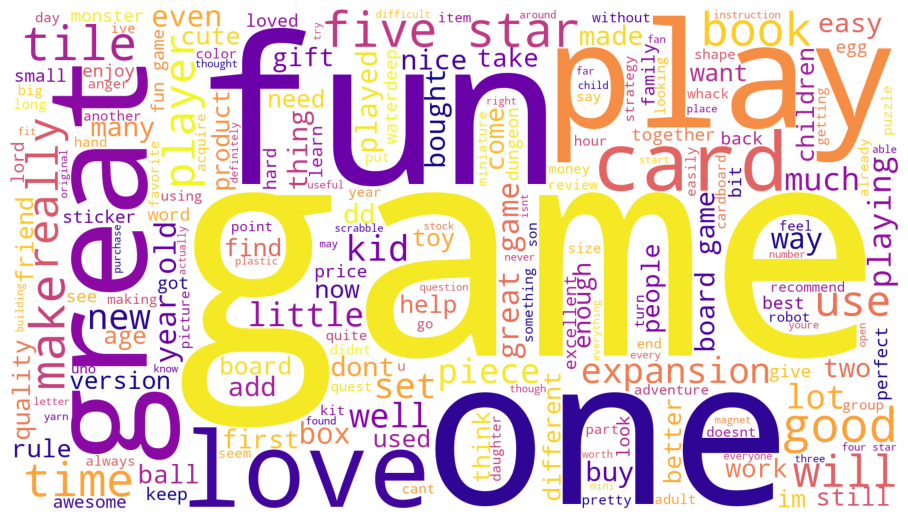

In [65]:
# Plot the wordcloud image.
plt.figure(figsize = (10, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [66]:
# Determine the 15 most common words.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'game': 1990, 'great': 875, 'fun': 770, 'one': 568, 'play': 528, 'like': 468, 'stars': 464, 'love': 416, 'good': 381, 'five': 362, ...})

In [67]:
# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,1990
great,875
fun,770
one,568
play,528
like,468
stars,464
love,416
good,381


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [68]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Determine polarity of both columns. 
df4['polarity_review'] = df4['review'].apply(generate_polarity)
df4['polarity_summary'] = df4['summary'].apply(generate_polarity)

# View output.
df4.head()

,index,review,summary,polarity_review,polarity_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.80
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.00
3,3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00
4,4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.00


In [69]:
# Provided function.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Determine polarity of both columns. 
df4['subjectivity_review'] = df4['review'].apply(generate_subjectivity)
df4['subjectivity_summary'] = df4['summary'].apply(generate_subjectivity)

# View output.
df4.head()

,index,review,summary,polarity_review,polarity_summary,subjectivity_review,subjectivity_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15,0.486111,0.500000
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.80,0.442976,0.900000
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.00,0.430435,0.733333
3,3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00,0.784848,0.000000
4,4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.00,0.316667,0.000000


In [70]:
# Review: Create a histogram plot with bins = 15.

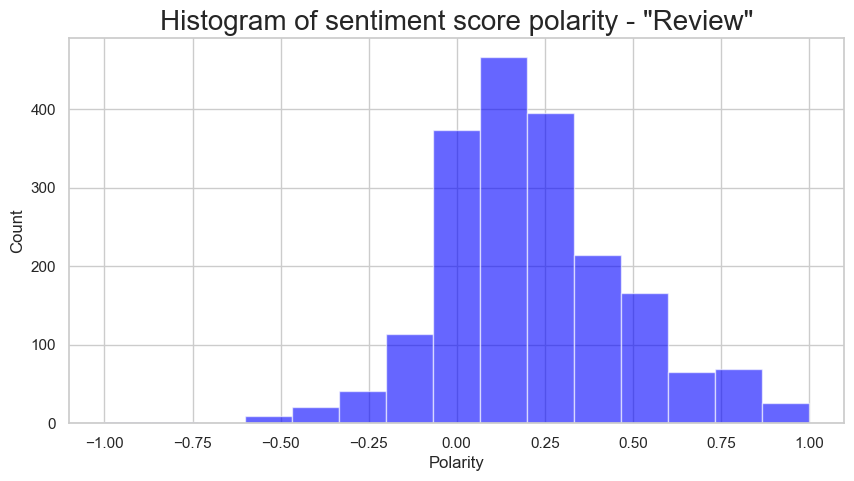

In [71]:
# Review: Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_review'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity - "Review"', fontsize=20)

plt.show()

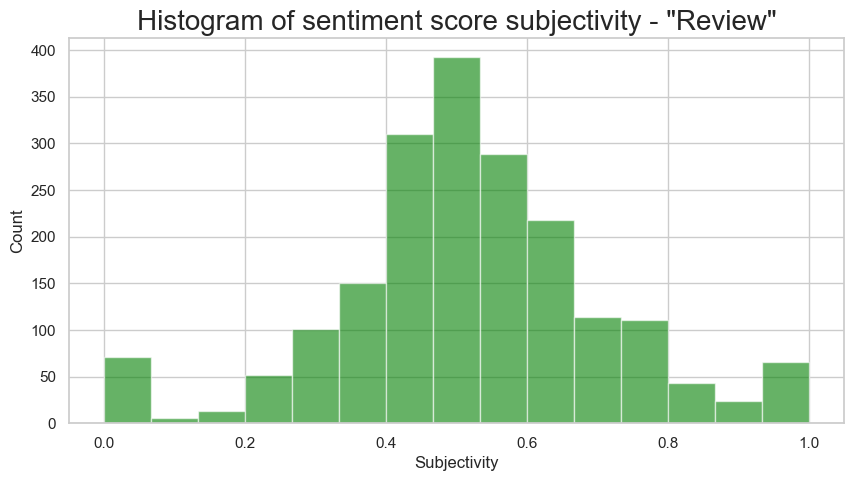

In [72]:
# Review: Histogram of subjectivity score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(df4['subjectivity_review'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity - "Review"', fontsize=20)

plt.show()

In [73]:
# Summary: Create a histogram plot with bins = 15.

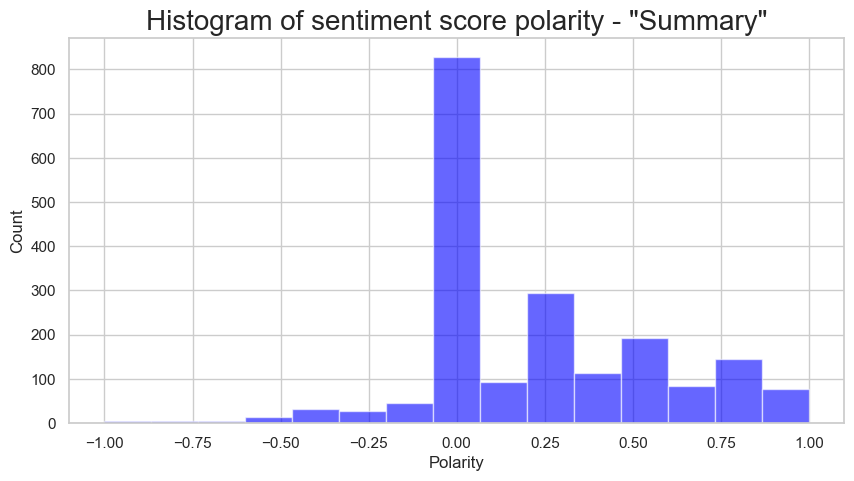

In [74]:
# Summary: Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_summary'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity - "Summary"', fontsize=20)

plt.show()

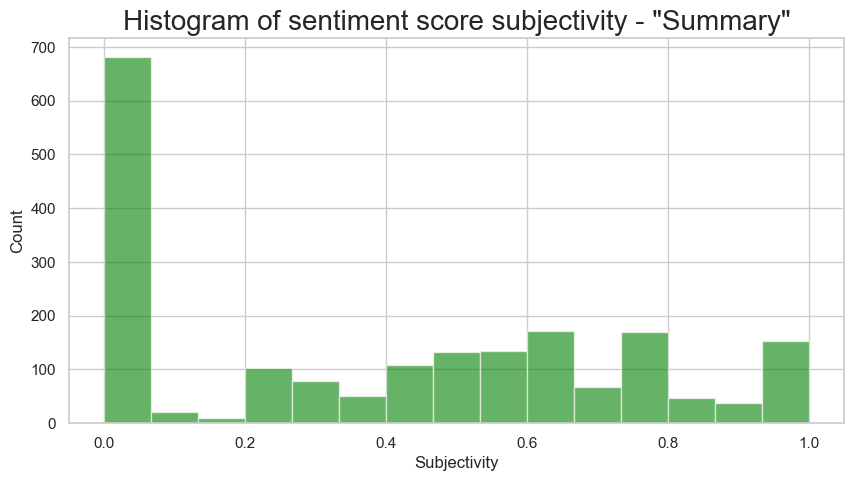

In [75]:
# Summary: Histogram of sentiment score
# Review: Histogram of subjectivity score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(df4['subjectivity_summary'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity - "Summary"', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [76]:
# Top 20 positive reviews.
positive_sentiment_r = df4.nlargest(20, 'polarity_review')
positive_sentiment_r = positive_sentiment_r[['review', 
                                             'polarity_review', 
                                             'subjectivity_review']]

# View output.
positive_sentiment_r

,review,polarity_review,subjectivity_review
7,came in perfect condition,1.0,1.0
164,awesome book,1.0,1.0
193,awesome gift,1.0,1.0
489,excellent activity for teaching selfmanagement...,1.0,1.0
517,perfect just what i ordered,1.0,1.0
583,wonderful product,1.0,1.0
601,delightful product,1.0,1.0
613,wonderful for my grandson to learn the resurre...,1.0,1.0
782,perfect,1.0,1.0
923,awesome,1.0,1.0


In [77]:
# Top 20 positive summaries.
positive_sentiment_s = df4.nlargest(20, 'polarity_summary')
positive_sentiment_s = positive_sentiment_s[['summary', 
                                             'polarity_summary', 
                                             'subjectivity_summary']]
# View output.
positive_sentiment_s

,summary,polarity_summary,subjectivity_summary
6,best gm screen ever,1.0,0.3
28,wonderful designs,1.0,1.0
32,perfect,1.0,1.0
80,theyre the perfect size to keep in the car or ...,1.0,1.0
133,perfect for preschooler,1.0,1.0
139,awesome sticker activity for the price,1.0,1.0
160,awesome book,1.0,1.0
162,he was very happy with his gift,1.0,1.0
186,awesome,1.0,1.0
209,awesome and welldesigned for 9 year olds,1.0,1.0


In [78]:
# Top 20 negative reviews.
negative_sentiment_r = df4.nsmallest(20, 'polarity_review')
negative_sentiment_r = negative_sentiment_r[['review', 
                                             'polarity_review', 
                                             'subjectivity_review']]

# View output.
negative_sentiment_r

,review,polarity_review,subjectivity_review
207,booo unles you are patient know how to measure...,-1.000000,1.000000
181,incomplete kit very disappointing,-0.780000,0.910000
1773,im sorry i just find this product to be boring...,-0.583333,0.750000
362,one of my staff will be using this game soon s...,-0.550000,0.300000
116,i bought this as a christmas gift for my grand...,-0.500000,0.900000
226,this was a gift for my daughter i found it dif...,-0.500000,1.000000
229,i found the directions difficult,-0.500000,1.000000
289,instructions are complicated to follow,-0.500000,1.000000
300,difficult,-0.500000,1.000000
1501,expensive for what you get,-0.500000,0.700000


In [79]:
# Top 20 negative summaries.
negative_sentiment_s = df4.nsmallest(20, 'polarity_summary')
negative_sentiment_s = negative_sentiment_s[['summary', 
                                             'polarity_summary', 
                                             'subjectivity_summary']]
# View output.
negative_sentiment_s

,summary,polarity_summary,subjectivity_summary
21,the worst value ive ever seen,-1.000000,1.000000
207,boring unless you are a craft person which i am,-1.000000,1.000000
819,boring,-1.000000,1.000000
1148,before this i hated running any rpg campaign d...,-0.900000,0.700000
1,another worthless dungeon masters screen from ...,-0.800000,0.900000
143,disappointed,-0.750000,0.750000
623,disappointed,-0.750000,0.750000
785,disappointed,-0.750000,0.750000
1591,disappointed,-0.750000,0.750000
361,promotes anger instead of teaching calming met...,-0.700000,0.200000


In [80]:
# Check for mean values of subjectivity and polarity
df4.describe()

,index,polarity_review,polarity_summary,subjectivity_review,subjectivity_summary
count,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000
mean,995.045385,0.213170,0.223678,0.516741,0.385615
std,577.274890,0.260360,0.337507,0.192895,0.340746
min,0.000000,-1.000000,-1.000000,0.000000,0.000000
25%,497.000000,0.045833,0.000000,0.423637,0.000000
50%,992.000000,0.177222,0.100000,0.508333,0.400000
75%,1493.000000,0.351562,0.475000,0.604286,0.650000
max,1999.000000,1.000000,1.000000,1.000000,1.000000


## 7. Discuss: Insights and observations

***Sentiment analysis***

The sentiment analysis helped us to gain insight into customers' satisfaction. We analysed reviews and summaries seperately.

> Reviews
- Polarity: the mean value is **0.21**. The polarity in reviews is left skewed with more positive reviews. However, we can see some comments on extreme ends of positivity and negativity.
- Subjecitvity: the mean value is **0.52**.  The reviews cumulate around 0.5 mixing both subjective and objective sentiment.

> Summary
- Polarity: the mean value is **0.22**. Polarity of summary is on average equal to polarity of reviews. However, we can see on the graph that customers tend to be more indifferent is summaries as opposed to reviews.
- Subjecitvity: the mean value is **0.39**. Customers are more objective in summaries than reviews.

Overall, the sentiment in reviews and sumamries is more positive. The summaries tend to be more indifferent and objective then reviews.

# 